### El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../../datasets/ecom-expense/Ecom Expense.csv")
df

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485
...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856


In [3]:
df.describe()

,Age,Items,Monthly Income,Transaction Time,Record,Total Spend
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,40.084674,7.884843,15962.884843,497.429603,4.928874,6163.176416
std,11.973412,4.283014,8046.517234,286.065147,3.084855,2799.772060
min,20.000000,1.000000,2003.000000,0.463297,0.000000,1099.815246
25%,30.000000,4.000000,9086.750000,253.443599,2.000000,3949.683101
50%,40.000000,8.000000,15764.000000,495.098046,5.000000,5602.193897
75%,51.000000,12.000000,23056.750000,745.833710,7.750000,8046.755618
max,60.000000,15.000000,30000.000000,1000.697201,10.000000,13944.048160


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [5]:
dummy_city_tier

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [6]:
dummy_gender

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2357,0,1
2358,0,1
2359,1,0
2360,1,0


In [7]:
columns_name = df.columns.values.tolist()
columns_name

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[columns_name].join(dummy_gender)
columns_name = df_new.columns.values.tolist()
columns_name

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male']

In [9]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0


In [10]:
df_new = df_new[columns_name].join(dummy_city_tier)
columns_name = df_new.columns.values.tolist()
columns_name

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [11]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0


In [12]:
columns_name

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [13]:
feature_cols = ["Monthly Income", 
                "Transaction Time", 
                'Gender_Female',
                'Gender_Male',
                'City_Tier 1',
                'City_Tier 2',
                'City_Tier 3']

In [14]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [15]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [16]:
lm.intercept_

3655.7294076906533

In [17]:
lm.coef_

array([   0.15297825,    0.12372609,  -94.15779883,   94.15779883,
        119.6632516 ,  -16.67901801, -102.9842336 ])

In [18]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.15297824609320512),
 ('Transaction Time', 0.12372608642619992),
 ('Gender_Female', -94.15779883032016),
 ('Gender_Male', 94.15779883032023),
 ('City_Tier 1', 119.66325160390109),
 ('City_Tier 2', -16.67901800799035),
 ('City_Tier 3', -102.98423359591068)]

In [19]:
lm.score(X,Y)

0.19478920552885381

In [20]:
feature_cols = ["Monthly Income", 
                "Transaction Time", 
                'Gender_Female',
                'Gender_Male',
                'City_Tier 1',
                'City_Tier 2',
                'City_Tier 3',
                'Record']

In [21]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [22]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [23]:
lm.intercept_

-79.4171303013718

In [24]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [25]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [26]:
lm.score(X,Y)

0.9179923586131016

In [27]:
df_new["prediction"] = -79.4171303013718 + df_new["Monthly Income"] *  0.14753898049205738 + df_new["Transaction Time"] * 0.15494612549589634 + df_new["Gender_Female"] *(-131.02501325554624) + df_new["Gender_Male"] *  131.02501325554607 + df_new["City_Tier 1"] * 76.76432601049513 + df_new["City_Tier 2"] * 55.1389743092325 + df_new["City_Tier 3"] * (-131.9033003197277) + df_new["Record"] * 772.2334457445645 

In [28]:
df_new

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094


In [29]:
SSD = np.sum((df_new["prediction"]-df_new["Total Spend"])**2)

In [30]:
SSD

1517733985.340816

In [31]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [32]:
RSE

803.1318809818165

In [33]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [34]:
error = RSE/sales_mean
error*100

13.031135680294161

In [35]:
#Otra forma más simple de calcular las predicciones
df_new["prediction 2"] =lm.predict(pd.DataFrame(df_new[feature_cols]))

In [36]:
df_new.head(5)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction,prediction 2
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


In [53]:
!pip install graphene

## Eliminar variables dummy redundantes

In [37]:
dummy_gende = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gende.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [38]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [45]:
columns_name = df.columns.values.tolist()

In [46]:
df_new = df[columns_name].join(dummy_gende)
columns_name = df_new.columns.values.tolist()
df_new = df_new[columns_name].join(dummy_city_tier)

In [47]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [48]:
df_new.columns.values.tolist()

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Male',
 'City_Tier 2',
 'City_Tier 3']

In [49]:
feature_cols = ['Monthly Income','Transaction Time','Gender_Male','City_Tier 2','City_Tier 3','Record']
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [50]:
print(lm.intercept_)

-133.67781754642238


In [51]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [53]:
lm.score(X,Y)

0.9179923586131016

## Transformación de variable para conseguir una relación no lineal

In [112]:
import pandas as pd

In [116]:
data_auto = pd.read_csv("../../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [117]:
data_auto.shape

(406, 9)

In [118]:
data_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [119]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [120]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'CV vs MPG')

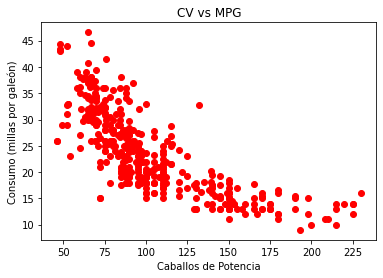

In [121]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"],data_auto["mpg"],"ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [122]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm= LinearRegression()
lm.fit(X[:,np.newaxis],Y)

<ipython-input-122-90234d38a8e2>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(X[:,np.newaxis],Y)


LinearRegression()

In [123]:
print(data_auto["mpg"].shape,data_auto["horsepower"].shape)

(406,) (406,)


<ipython-input-124-af94cef54401>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, lm.predict(X[:,np.newaxis]),color="blue")


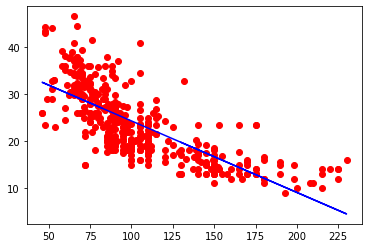

In [124]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X[:,np.newaxis]),color="blue")

In [125]:
X_dim = X[:,np.newaxis]

<ipython-input-125-36e6f4cc30ab>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_dim = X[:,np.newaxis]


In [126]:
lm.score(X_dim,Y)

0.574653340645025

In [127]:
SSD = np.sum((Y - lm.predict(X_dim))**2)
RSE = np.sqrt(SSD/(len(X_dim)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, error

(10315.75196006092, 5.046879480825511, 0.21462773361633458)

## Modelo de regresión cuadratico
* mpg = a + b hosepower^2

In [128]:
X_data = X**2
X_data = X_data[:,np.newaxis]

<ipython-input-128-0fbc87fb4e85>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X_data[:,np.newaxis]


In [129]:
lm.fit(X_data,Y)

LinearRegression()

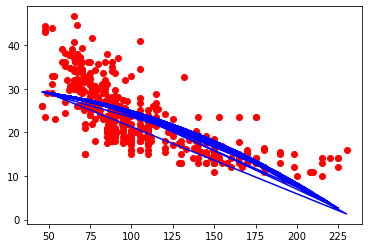

In [130]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X_data),color="blue")

In [131]:
lm.score(X_data,Y)

0.4849887034823205

In [132]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean,error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de regresión lineal y cuadrático
* mpg = a + b hosepower + c +hosepower ^2

In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [134]:
poly = PolynomialFeatures(degree=2)

In [135]:
X_data = poly.fit_transform(X[:,np.newaxis])

<ipython-input-135-9fe0cf666176>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])


In [136]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [137]:
lm.score(X_data,Y)

0.6439066584257469

In [138]:
lm.intercept_

55.02619244708036

In [139]:
for d in range(2,6):
    poly=PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print(lm.score(X_data,Y))

0.6439066584257469
0.6444678885560744
0.6467674189704502
0.6547512489366876


<ipython-input-139-c60e4d22f270>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
<ipython-input-139-c60e4d22f270>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
<ipython-input-139-c60e4d22f270>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
<ipython-input-139-c60e4d22f270>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before index

## El problema de los outliers

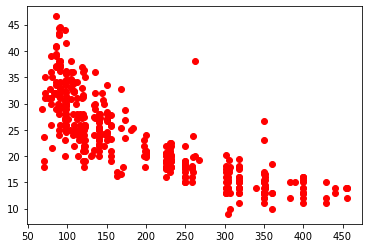

In [140]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [151]:
X_data = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X_data = X_data[:,np.newaxis]
Y_data = data_auto["mpg"].fillna(data_auto["mpg"].mean())

<ipython-input-151-3785716b54a2>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X_data[:,np.newaxis]


In [154]:
lm = LinearRegression()
lm.fit(X_data,Y_data)

LinearRegression()

In [155]:
lm.score(X_data,Y_data)

0.6261049762826918

In [159]:
data_auto[(data_auto['displacement']>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [160]:
data_auto[(data_auto['displacement']>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [161]:
data_auto_clean = data_auto.drop([358,395,305,372])
data_auto_clean

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [162]:
X_data = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X_data = X_data[:,np.newaxis]
Y_data = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

<ipython-input-162-15e70b60fd5c>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X_data[:,np.newaxis]


In [163]:
lm = LinearRegression()
lm.fit(X_data,Y_data)

LinearRegression()

In [164]:
lm.score(X_data,Y_data)

0.6458732594517579

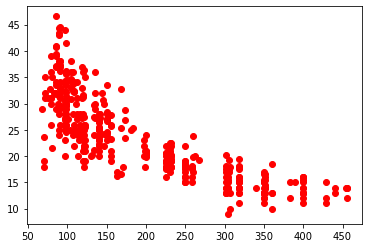

In [165]:
plt.plot(data_auto_clean["displacement"], data_auto_clean["mpg"], "ro")

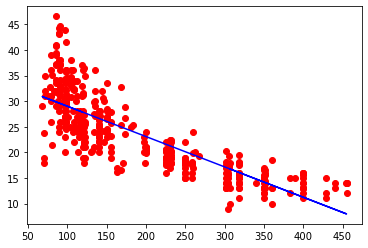

In [168]:
%matplotlib inline
plt.plot(data_auto_clean["displacement"], data_auto_clean["mpg"], "ro")
plt.plot(data_auto_clean["displacement"], lm.predict(X_data),color="blue")